# SIECI NEURONOWE, PROJEKT 1
#### Autorzy: Mikołaj Rzepiński, Damian Wysokiński

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Wybór liczby warstw i liczby węzłów w każdej warstwie

Wybór liczby węzłów w warstwie zerowej (input layer) zależy od rodzaju problemu - czy mamy regresję, czy klasyfikację oraz od liczby kolumn z danymi pobieranymi z plików csv. Analogiczna sytuacja jest z ostatnią warstwą (output layer). Ponadto w warstwie ostatniej wybiera się funkcję aktywacji stosowną do problemu:
- dla regresji (funkcja liniowa)
- dla klasyfikacji (softmax, liczba węzłów zależna od liczby unikalnych wartości w zbiorze uczącym)

##### Dla regresji

Mamy 2 możliwości:
- x - > y
- x, y -> z

In [2]:
regression_problem = True
classification_problem = False

In [3]:
#dodac dostosowanie do tego czy jest to plik do regresji czy klasyfikacji

if(regression_problem):
    regression_train_file = 'regression\data.activation.train.100.csv' #jak działasz na linuxie to musisz dostosować \ na /
    regression_df = pd.read_csv(regression_train_file)
    print(regression_df.head())
    
regression_df.head()

          x           y
0 -1.519345 -246.176377
1  0.144673 -139.145933
2  3.209500  -11.609238
3 -1.066817 -223.183756
4  1.760798  -44.009923


,x,y
0,-1.519345,-246.176377
1,0.144673,-139.145933
2,3.209500,-11.609238
3,-1.066817,-223.183756
4,1.760798,-44.009923


In [4]:
if(regression_problem):
    x_train = np.array(regression_df['x']).reshape(1,-1)
    y_real = np.array(regression_df['y']).reshape(1,-1)

In [5]:
regression_df.shape

(100, 2)

In [6]:
x_train.shape

(1, 100)

In [7]:
if(regression_problem):
    n_nodes_input_layer = 1
elif(classification_problem):
    n_nodes_input_layer = 2

input_layer = [
    {
        "n_nodes": n_nodes_input_layer,
        "activation_function": None
    },
]

hidden_layers = [
    {
        "n_nodes": 2,
        "activation_function": "relu"
    },
    {
        "n_nodes": 4,
        "activation_function": "relu"
    },   
]

if(regression_problem):
    n_nodes_output_layer = 1
elif(classification_problem):
    n_nodes_output_layer = 3
    
output_layer = [
    {
        "n_nodes": n_nodes_output_layer,
        "activation_function": "linear"
    }, ]

layers = input_layer + hidden_layers + output_layer
layers

[{'n_nodes': 1, 'activation_function': None},
 {'n_nodes': 2, 'activation_function': 'relu'},
 {'n_nodes': 4, 'activation_function': 'relu'},
 {'n_nodes': 1, 'activation_function': 'linear'}]

W zależności od tego czy chcemy uwzględnić bias w sieci można zmieniać wartość include bias jako True/False

In [8]:
include_bias = True

In [9]:
def initialize_parameters(x_train, layers, include_bias = True):
    # zwraca slownik z wagami i biasami np. parameters['w1'], parameters['b1']
    #print(x_train.shape)
    #print()
    np.random.seed(42) # jeśli chcemy za każdym razem te same wyniki
    
    n_features = x_train.shape[0]
    n_examples = x_train.shape[1]
    
    n_layers = len(layers) # 1 dla input layer, 1 dla output layer
#     print(n_layers)
    
    parameters = {}
    activation_values = {}
    
    
    activation_values['0'] = x_train # wartosci x_train są jednocześnie wartościami aktywacji w zerwowej warstwie
    
    for n_layer in range(1,n_layers):
        #print(n_layer)
        #print(layers[n_layer])
        parameters["W" + str(n_layer)] = np.random.randn(layers[n_layer]["n_nodes"], layers[n_layer-1]["n_nodes"]) * 0.01 #wczesniej
        if(include_bias):
            parameters["b" + str(n_layer)] = np.zeros((layers[n_layer]["n_nodes"],1))
#         print(parameters["W" + str(n_layer)])
     
#     print(parameters)
    return parameters, activation_values

In [10]:
parameters, activation_values = initialize_parameters(x_train,layers)

In [11]:
parameters

{'W1': array([[ 0.00496714],
        [-0.00138264]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[ 0.00647689,  0.0152303 ],
        [-0.00234153, -0.00234137],
        [ 0.01579213,  0.00767435],
        [-0.00469474,  0.0054256 ]]),
 'b2': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W3': array([[-0.00463418, -0.0046573 ,  0.00241962, -0.0191328 ]]),
 'b3': array([[0.]])}

In [12]:
activation_values

{'0': array([[-1.51934453,  0.1446731 ,  3.20949991, -1.06681652,  1.7607981 ,
          1.70840608,  4.53553337,  3.0228904 , -1.10129773,  2.52267731,
          4.823367  ,  2.84927674,  1.30866658,  4.27079203,  0.68625578,
         -0.27886859,  0.2042488 ,  3.01805761,  2.00416261,  0.59999959,
          3.80098822,  1.81778992,  4.70265148,  3.66821905,  1.90145948,
         -0.34648432,  0.62812005,  1.46123206,  0.92681654,  2.22652618,
          0.10110583, -1.52138493, -0.48022763,  1.7374457 ,  4.79876335,
          2.83254081,  1.78726461,  3.35024563,  3.98594694,  4.37628621,
          4.49568535,  0.81213534, -1.5886341 , -1.02623644,  3.53502416,
          2.94771761, -0.31568944,  4.58435169, -1.2957231 ,  0.97205132,
          2.37877606,  0.81705418,  4.13108753, -1.30679679,  0.79041549,
         -0.98523628,  0.19673326, -1.11164594,  4.12027928, -1.93793277,
         -1.15428563,  1.45886217,  2.19511646,  3.26670646,  1.1100335 ,
          0.37652113,  0.15608049

In [13]:
#g_values

In [14]:
def z_forward(parameters, activation_values, z_values,  index_of_layer):
    z_values[str(index_of_layer)] = np.dot(parameters['W' + str(index_of_layer)],
                                                 activation_values[str(index_of_layer -1)]) + parameters['b' + str(index_of_layer)]
#     print(parameters['Z'+str(index_of_layer)])
#     print()
#     print(parameters['Z'+str(index_of_layer)].shape)

In [15]:
z_forward(parameters, activation_values, {'xd': 1}, 1)

#### activation functions:

In [16]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def leaky_relu(x):
    return np.maximum(0.1*x, x)

def linear(x):
    return x;

# do zweryfikowania ze wzgledu na obliczanie wzgledem okreslonego wektora(axis)
def softmax(x):
    expo = np.exp(x)
    expo_sum = np.sum(np.exp(x))
    return expo/expo_sum

In [17]:
def forward_with_activation(z, activation_values, activation_function, index):
    if(activation_function == 'linear'):
        activation_values[str(index)] = linear(z)
        
    elif(activation_function == 'sigmoid'):
        activation_values[str(index)] = sigmoid(z)
        
    elif(activation_function == 'relu'):
        activation_values[str(index)] = relu(z)
        
    elif(activation_function == 'leaky_relu'):
        activation_values[str(index)] = leaky_relu(z)
        
    elif(activation_function == 'softmax'):
        activation_values[str(index)] = softmax(z)

In [18]:
def get_activation_functions(layers):
    activation_functions = {}
    for idx, layer in enumerate(layers):
        activation_functions[str(idx)] = layer['activation_function']
    
    return activation_functions
    

In [19]:
get_activation_functions(layers)

{'0': None, '1': 'relu', '2': 'relu', '3': 'linear'}

- **activation_values** to słownik zawierający: klucze -> numer warstwy, wartość -> macierz z wartościami aktywacji obliczonymi dla danej warstwy
- **activation_functions** to słownik zawierający: klucze -> numer warstwy, wartość -> nazwa funkcji aktywacji dla danej warstwy

In [20]:
def all_layers_forward_propagation(parameters, activation_values, activation_functions, z_values, no_of_layers):
    for idx in range(1, no_of_layers):
        z_forward(parameters, activation_values, z_values,  idx)
        forward_with_activation(z_values[str(idx)], activation_values, activation_functions[str(idx)], idx)
        #print('')

In [21]:
def linear_derivative():
    return 1

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def leaky_relu_derivative(x):
    x[x<=0] = 0.1
    x[x>0] = 1
    return x

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax_derivative(x):
    #to be implemented
    pass


In [22]:
def all_layers_back_propagation_hardcoded(y_true, parameters, gradients, activation_values, activation_functions, z_values, no_of_layers):
    
    m = y_true.shape[1]
    
    # WARSTWA 3
    gradients['dZ3'] = (activation_values['3'] - y_true) * 1 # 1 bo to pochodna funkcji liniowej
    gradients['dW3'] = 1/m * np.dot(gradients['dZ3'], activation_values['2'].T)
    gradients['db3'] = 1/m * np.sum(gradients['dZ3'], axis=1, keepdims=True)
    
    # WARSTWA 2
    gradients['dZ2'] = np.dot(parameters['W3'].T, gradients['dZ3']) * relu_derivative(activation_values['2']) 
    gradients['dW2'] = 1/m * np.dot(gradients['dZ2'], activation_values['1'].T)
    gradients['db2'] = 1/m * np.sum(gradients['dZ2'], axis=1, keepdims=True)
    
    # WARSTWA 1
    gradients['dZ1'] = np.dot(parameters['W2'].T, gradients['dZ2']) * relu_derivative(activation_values['1']) 
    gradients['dW1'] = 1/m * np.dot(gradients['dZ1'], activation_values['0'].T)
    gradients['db1'] = 1/m * np.sum(gradients['dZ1'], axis=1, keepdims=True)
    
   
    
    
    
    
    
    
    

In [41]:
def last_layer_back_propagation(gradients, activation_values, activation_functions, z_values, error_type, index, y_true):
    m = y_true.shape[1]
    
    if(activation_functions[str(index)] == 'linear'):
        #print('calling last layer, linear activation', 'index:', index)
        activation_function_derivative = linear_derivative()
        
    elif(activation_functions[str(index)] == 'relu'):
        activation_function_derivative = relu_derivative(activation_values[str(index)])
        
    elif(activation_functions[str(index)] == 'leaky_relu'):
        activation_function_derivative = leaky_relu_derivative(activation_values[str(index)])
    
    if(error_type == 'MSE'):
        #print('activation_function_derivative w ostatniej warstwie  - automated')
        #print(activation_function_derivative)
        
        gradients['dZ' + str(index)] = (activation_values[str(index)] - y_true) * activation_function_derivative 
#     print("gradients['dZ3'].shape", gradients['dZ3'].shape)
        gradients['dW' + str(index)] = 1/m * np.dot(gradients['dZ'+str(index)], activation_values[str(index - 1)].T)
        gradients['db' + str(index)] = 1/m * np.sum(gradients['dZ'+str(index)], axis=1, keepdims=True)

In [24]:
def mid_layer_back_propagation(gradients, activation_values, activation_functions, z_values, error_type, index, y_true):
    m = y_true.shape[1]
    
    if(activation_functions[str(index)] == 'linear'):
        activation_function_derivative = linear_derivative()
        
    elif(activation_functions[str(index)] == 'relu'):
        #print('calling mid layer, relu activation', 'index:', index)
        activation_function_derivative = relu_derivative(activation_values[str(index)])
        
    elif(activation_functions[str(index)] == 'leaky_relu'):
        activation_function_derivative = leaky_relu_derivative(activation_values[str(index)])
    
     # WARSTWA 1 lub 2
        #index = 1 lub 2
    if(error_type == 'MSE'):
        gradients['dZ' + str(index)] = np.dot(parameters['W'+str(index + 1)].T, gradients['dZ'+str(index+1)]) #* relu_derivative(activation_values[str(index)])#activation_function_derivative
#     print("gradients['dZ3'].shape", gradients['dZ3'].shape)
        gradients['dW'+str(index)] = 1/m * np.dot(gradients['dZ'+str(index)], activation_values[str(index - 1)].T)
        gradients['db'+str(index)] = 1/m * np.sum(gradients['dZ'+str(index)], axis=1, keepdims=True)

In [25]:
def mid_layer_back_propagation_vol_two(gradients, activation_values, activation_functions, z_values, error_type, index, y_true):
    
    
    m = y_true.shape[1]
    
    
    if(error_type == 'MSE'):
        gradients['dZ'+str(index)] = np.dot(parameters['W'+str(index + 1)].T, gradients['dZ'+str(index + 1)])  *relu_derivative(activation_values[str(index)])
        gradients['dW'+str(index)] = 1/m * np.dot(gradients['dZ'+str(index)], activation_values[str(index - 1)].T)
        gradients['db'+str(index)] = 1/m * np.sum(gradients['dZ'+str(index)], axis=1, keepdims=True)
    
    
    
   # gradients['dZ1'] = np.dot(parameters['W2'].T, gradients['dZ2']) * relu_derivative(activation_values['1']) 
   # gradients['dW1'] = 1/m * np.dot(gradients['dZ1'], activation_values['0'].T)
   # gradients['db1'] = 1/m * np.sum(gradients['dZ1'], axis=1, keepdims=True)
    
    
     # WARSTWA 1
    #gradients['dZ1'] = np.dot(parameters['W2'].T, gradients['dZ2']) #* relu_derivative(activation_values['1']) 
#     print("gradients['dZ3'].shape", gradients['dZ3'].shape)
    #gradients['dW1'] = 1/m * np.dot(gradients['dZ1'], activation_values['0'].T)
    #gradients['db1'] = 1/m * np.sum(gradients['dZ1'], axis=1, keepdims=True)

In [26]:
def all_layers_back_propagation_automated(y_true, parameters, gradients, activation_values, activation_functions, z_values, no_of_layers):
    
    m = y_true.shape[1]
    
    for i in reversed(range(1,no_of_layers)):
        
        if(i == no_of_layers - 1):
            last_layer_back_propagation(gradients, activation_values, activation_functions,z_values,'MSE',i,y_true)
        
        else:
            mid_layer_back_propagation_vol_two(gradients,activation_values,activation_functions,z_values,'MSE',i,y_true)
        
    
            
            
            # WARSTWA 1
    #gradients['dZ1'] = np.dot(parameters['W2'].T, gradients['dZ2']) * relu_derivative(activation_values['1']) 
#     print("gradients['dZ3'].shape", gradients['dZ3'].shape)
    #gradients['dW1'] = 1/m * np.dot(gradients['dZ1'], activation_values['0'].T)
    #gradients['db1'] = 1/m * np.sum(gradients['dZ1'], axis=1, keepdims=True)

            
            
#     gradients['dZ2'] = np.dot(parameters['W3'].T, gradients['dZ3']) * relu_derivative(z_values['2'])
#     print("gradients['dZ3'].shape", gradients['dZ3'].shape)
#     gradients['dW2'] = 1/m * np.dot(gradients['dZ2'], activation_values['1'].T)
#     gradients['db2'] = 1/m * np.sum(gradients['dZ2'], axis=1, keepdims=True)
    
    # WARSTWA 1
#     gradients['dZ1'] = np.dot(parameters['W2'].T, gradients['dZ2']) * relu_derivative(z_values['1'])
#     print("gradients['dZ3'].shape", gradients['dZ3'].shape)
#     gradients['dW1'] = 1/m * np.dot(gradients['dZ1'], activation_values['0'].T)
#     gradients['db1'] = 1/m * np.sum(gradients['dZ1'], axis=1, keepdims=True)

In [27]:
def calculate_error(y_hat, y_true, error_type = None):
#     print('y_hat')
#     print(y_hat)
#     print('------')
#     print('y_true')
#     print(y_true)
    
    n_examples = y_hat.shape[1]
    
#     print('n_examples:', n_examples)
    if(error_type == 'MSE'):
#         print('srednie y_true:', 1/n_examples*np.sum(np.abs(y_true)))
        
#         print('MSE')
        #print('MSE value:', 1/n_examples * np.sum((y_true - y_hat)**2))
        #print('MSE error: ', 1/n_examples * np.sum((y_true - y_hat)**2))
        return 1/n_examples * np.sum((y_true - y_hat)**2)

In [28]:
def print_activation_values(activation_values):
    for key, value in activation_values.items():
        print(key)
        print(value.shape)
        print(value)
        print('liczba wartosci wiekszych niz 0', np.sum(value > 1))
        print("-------")
        
        if(key == '3'):
            print('xdddddd')

In [29]:
def update_parameters(parameters, gradients, no_of_layers, learning_rate = 0.001):
    
    for i in range(1,no_of_layers):
        parameters['W' + str(i)] += - learning_rate * gradients['dW'+str(i)]
        parameters['b' + str(i)] += -learning_rate * gradients['db' + str(i)]

In [42]:
def neural_network_regression(x_train, y_train, layers, no_of_iterations = 5000, include_bias = True, error_type='MSE'):
    parameters , activation_values = initialize_parameters(x_train, layers, include_bias)
    
    g_values = {}
    g_prime_values = {}
    activation_functions = get_activation_functions(layers) # {'0': 'relu', '1': 'sigmoid', ...}
    z_values = {}
    gradients = {}
    losses = []
    
    no_of_layers = len(layers)
    
    for i in range(1, 5000): 
        all_layers_forward_propagation(parameters, activation_values, activation_functions, z_values, no_of_layers)
        
        #if(i%50 == 0):
        losses.append(calculate_error(activation_values[str(no_of_layers - 1)], y_train, error_type))
        #all_layers_back_propagation_hardcoded(y_train,parameters, gradients, activation_values, activation_functions, z_values, no_of_layers)
        all_layers_back_propagation_automated(y_train,parameters,gradients,activation_values,activation_functions,z_values,no_of_layers)
        update_parameters(parameters,gradients,no_of_layers)
        
    #print(losses)
   # print_activation_values(activation_values)
    print('ostatni blad po pierwiastkowaniu: ', np.sqrt(losses[-1]))
    
    #plt.figure(figsize=(20,10))
    plt.plot(losses[100:])
    #plt.plot(losses)
    plt.show()
    
    return parameters
    

ostatni blad po pierwiastkowaniu:  88.57438918842027


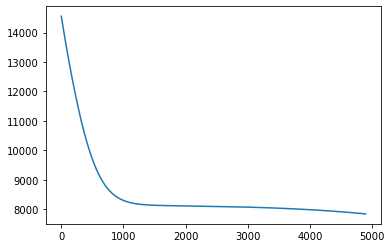

In [43]:
# x_train, layers, no_of_iterations = 5001, include_bias = True
new_parameters = neural_network_regression(x_train, y_real, layers, no_of_iterations = 5000, include_bias = include_bias) 
#zmienic drugi parametr na y_train gdy będzie znany


In [32]:
parameters

{'W1': array([[ 0.00496714],
        [-0.00138264]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[ 0.00647689,  0.0152303 ],
        [-0.00234153, -0.00234137],
        [ 0.01579213,  0.00767435],
        [-0.00469474,  0.0054256 ]]),
 'b2': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W3': array([[-0.00463418, -0.0046573 ,  0.00241962, -0.0191328 ]]),
 'b3': array([[0.]])}

In [33]:
new_parameters

{'W1': array([[ 1.23709384],
        [-1.71293573]]),
 'b1': array([[1.14956892],
        [2.67216441]]),
 'W2': array([[-2.82066400e-01,  7.84714644e-01],
        [-2.34153375e-03, -2.34136957e-03],
        [ 6.94074494e-01,  8.44468267e-02],
        [-1.51320549e+00,  3.06701223e+00]]),
 'b2': array([[ 2.19381995],
        [ 0.        ],
        [-0.11550463],
        [ 8.50652144]]),
 'W3': array([[-2.32622141e+00, -4.65729754e-03,  7.08448304e-01,
         -9.08354606e+00]]),
 'b3': array([[-6.13831809]])}

In [34]:
def predict_regression(parameters, x_test):
    pass

In [35]:
#if(regression_problem):
 #   predict_regression(parameters, x_test)